<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/FBProphet_Use_ScrapData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/CSV_Files/")

In [4]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.dtypes

Month            object
AirPassengers     int64
dtype: object

In [6]:
data['Month'] = pd.DatetimeIndex(data['Month'])# Convert Object to time in dataframe
data.head()

,Month,AirPassengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          144 non-null    datetime64[ns]
 1   AirPassengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
data.set_index('Month')

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          144 non-null    datetime64[ns]
 1   AirPassengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<Axes: xlabel='Month'>

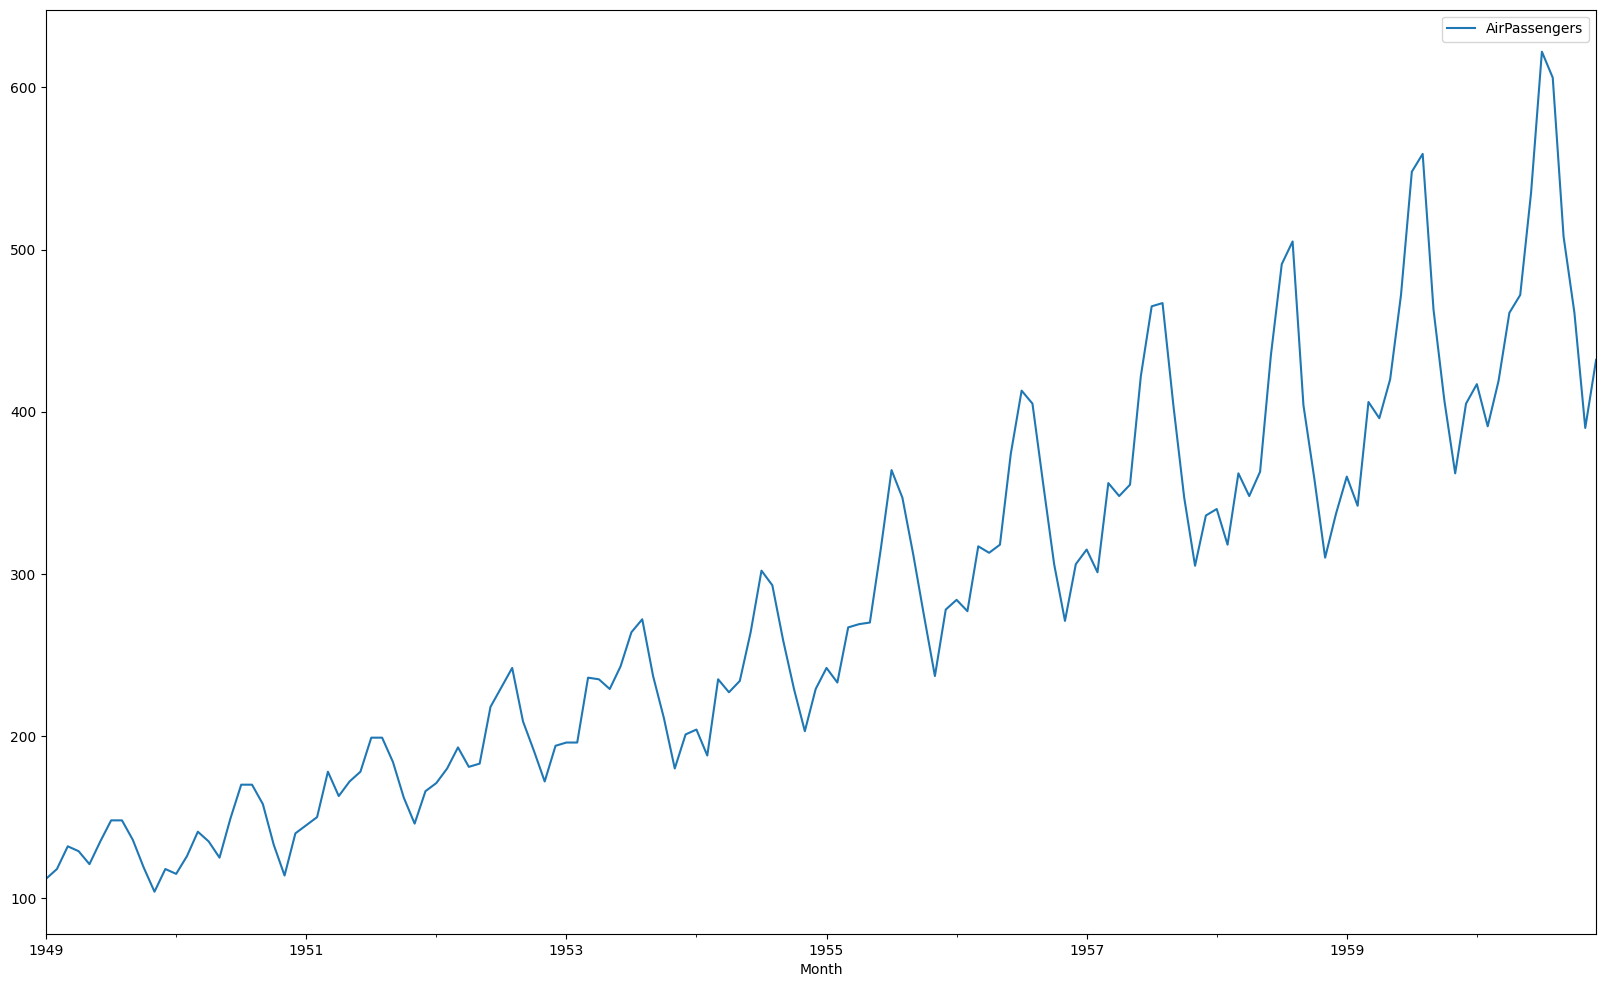

In [10]:
data.set_index('Month').plot(figsize=(20, 12))# the best way for plotting

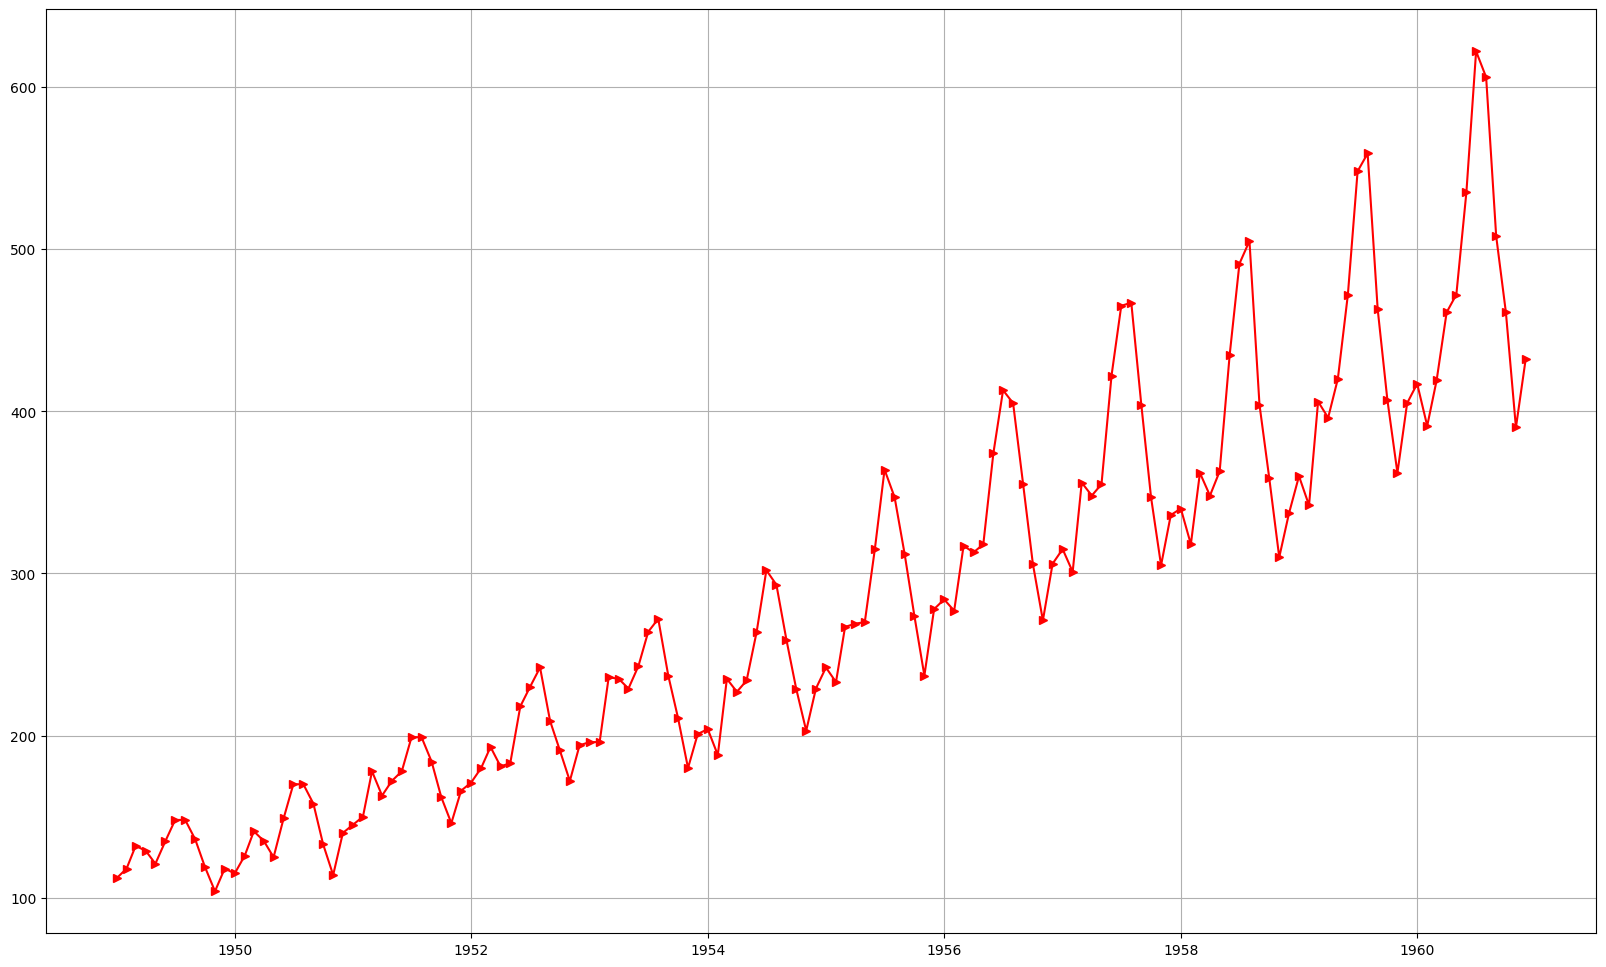

In [11]:
plt.figure(figsize=(20, 12))
plt.plot(data['Month'], data['AirPassengers'], 'r>-')
plt.grid()

In [12]:
data1949=data[(data['Month']<='1949-12-01') ]

In [13]:
data1949_max_passenger=data1949['AirPassengers'].min()

In [14]:
data1949_max_passenger

104

In [15]:
data1949_max_passenger_date=data1949[data1949['AirPassengers']==data1949_max_passenger]

In [16]:
data1949_max_passenger_date

,Month,AirPassengers
10,1949-11-01,104


In [17]:
p = Prophet()

In [18]:
data = data.rename(columns={# In prophet the feature  column is ds and the target column is y
    'Month': 'ds',
    'AirPassengers': 'y'
})
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [19]:
data.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [20]:
p.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemi2lex4/rl956n1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemi2lex4/s0li_7ma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63927', 'data', 'file=/tmp/tmpemi2lex4/rl956n1s.json', 'init=/tmp/tmpemi2lex4/s0li_7ma.json', 'output', 'file=/tmp/tmpemi2lex4/prophet_modelkz4ebj1l/prophet_model-20230821063418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:34:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:34:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
future = p.make_future_dataframe(periods=18, freq='MS')# the previous data has 144 rows this period include 36 month and overall is 144+36=180 rows
future# Infact the new month start from 1361/01/01 to 1363/12/01 with index 179

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
157,1962-02-01
158,1962-03-01
159,1962-04-01
160,1962-05-01


In [22]:
data

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [23]:
forecast = p.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.398252,57.127916,115.420095,107.398252,107.398252,-21.393308,-21.393308,-21.393308,-21.393308,-21.393308,-21.393308,0.0,0.0,0.0,86.004944
1,1949-02-01,109.544420,50.495648,109.428913,109.544420,109.544420,-30.060620,-30.060620,-30.060620,-30.060620,-30.060620,-30.060620,0.0,0.0,0.0,79.483800
2,1949-03-01,111.482895,81.973925,138.883451,111.482895,111.482895,-0.469818,-0.469818,-0.469818,-0.469818,-0.469818,-0.469818,0.0,0.0,0.0,111.013077
3,1949-04-01,113.629063,82.440886,137.312034,113.629063,113.629063,-4.917723,-4.917723,-4.917723,-4.917723,-4.917723,-4.917723,0.0,0.0,0.0,108.711340
4,1949-05-01,115.706000,82.695688,140.697592,115.706000,115.706000,-3.618250,-3.618250,-3.618250,-3.618250,-3.618250,-3.618250,0.0,0.0,0.0,112.087749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1962-02-01,527.589767,468.002136,523.986134,526.821962,528.342125,-31.659408,-31.659408,-31.659408,-31.659408,-31.659408,-31.659408,0.0,0.0,0.0,495.930359
158,1962-03-01,530.413106,503.375871,560.150770,529.546618,531.240629,1.149357,1.149357,1.149357,1.149357,1.149357,1.149357,0.0,0.0,0.0,531.562463
159,1962-04-01,533.538946,500.458357,558.134403,532.569500,534.472025,-5.865952,-5.865952,-5.865952,-5.865952,-5.865952,-5.865952,0.0,0.0,0.0,527.672994
160,1962-05-01,536.563952,505.661861,563.217998,535.498093,537.592680,-2.804194,-2.804194,-2.804194,-2.804194,-2.804194,-2.804194,0.0,0.0,0.0,533.759759


In [25]:
data_predicted=forecast.iloc[144:,:]

In [26]:
data_predicted['yhat']

144    466.266376
145    460.724903
146    493.139045
147    491.816980
148    496.141458
149    537.250926
150    576.817218
151    577.239032
152    528.679410
153    493.518349
154    459.662647
155    489.023969
156    502.040696
157    495.930359
158    531.562463
159    527.672994
160    533.759759
161    573.193785
Name: yhat, dtype: float64

In [27]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

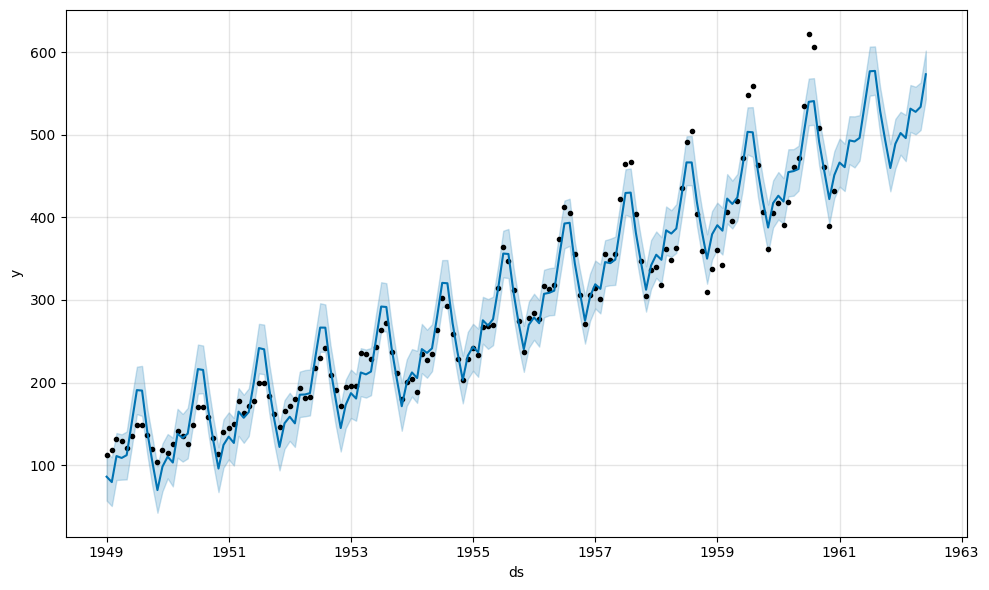

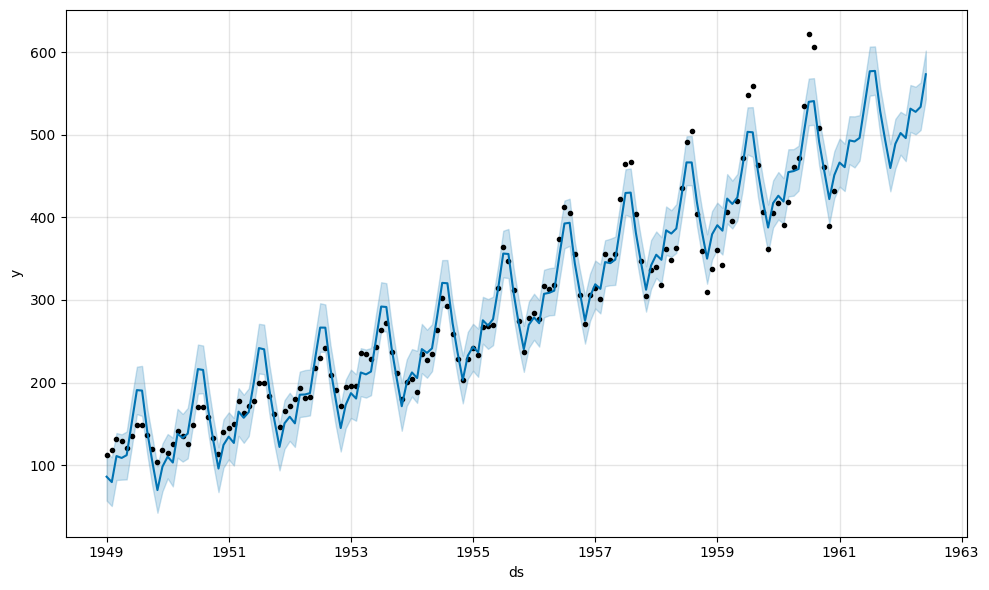

In [28]:
p.plot(forecast, uncertainty=True)

In [29]:
!pip install BeautifulSoup4

In [31]:
! pip install requests

In [32]:
! pip install lxml

In [33]:
from bs4 import BeautifulSoup
import requests

In [34]:
# Define URL
url = 'https://www.tgju.org/profile/geram18/history'
# Ask hosting server to fetch url
requests.get(url)

<Response [200]>

In [35]:
pages = requests.get(url)
pages.text

'<!doctype html>\n<html dir="rtl" data-dir="rtl" lang="fa" data-revision="2023082111">\n<head>\n<title>آرشیو قیمت طلای 18 عیار / 750 | شبکه اطلاع\u200c رسانی طلا و ارز </title>\n<meta charset="utf-8">\n<script src="/cdn-cgi/apps/head/ks0hMfVvAzzkfKN7j9EQZgwSuNE.js"></script><link rel="preconnect" href="https://static.tgju.org">\n<link rel="preconnect" href="https://call.tgju.org">\n<link rel="dns-prefetch" href="https://static.tgju.org">\n<link rel="dns-prefetch" href="https://call.tgju.org">\n<meta name="generator" content="Vandaw Parin 2.0 (vandaw.com/parin)">\n<link rel="search" type="application/opensearchdescription+xml" href="https://www.tgju.org/opensearch.xml" title="TGJU">\n<base href="https://www.tgju.org/">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<meta name="theme-color" content="#35608c">\n<link rel="apple-touch-icon" sizes="180x180" href="https://www.tgju.org/touch-icon-ipad.png">\n<meta name="robots" content="index, follow">\n<meta name="a

In [51]:
# parser-lxml = Change html to Python friendly format
soup = BeautifulSoup(pages.text, 'lxml')
soup

<!DOCTYPE html>
<html data-dir="rtl" data-revision="2023082111" dir="rtl" lang="fa">
<head>
<title>آرشیو قیمت طلای 18 عیار / 750 | شبکه اطلاع‌ رسانی طلا و ارز </title>
<meta charset="utf-8"/>
<script src="/cdn-cgi/apps/head/ks0hMfVvAzzkfKN7j9EQZgwSuNE.js"></script><link href="https://static.tgju.org" rel="preconnect"/>
<link href="https://call.tgju.org" rel="preconnect"/>
<link href="https://static.tgju.org" rel="dns-prefetch"/>
<link href="https://call.tgju.org" rel="dns-prefetch"/>
<meta content="Vandaw Parin 2.0 (vandaw.com/parin)" name="generator"/>
<link href="https://www.tgju.org/opensearch.xml" rel="search" title="TGJU" type="application/opensearchdescription+xml"/>
<base href="https://www.tgju.org/"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="#35608c" name="theme-color"/>
<link href="https://www.tgju.org/touch-icon-ipad.png" rel="apple-touch-icon" sizes="180x180"/>
<meta content="index, follow" name="robots"/>
<meta content="yes" nam

In [47]:
# Access table tag
Table_attres=soup.table.tbody
Table_attres.children

In [97]:
table1 = soup.find('table')
table1

<table class="table widgets-dataTable table-hover text-center history-table">
<thead class="text-center">
<tr>
<th data-target="profile-tour-step-14">بازگشایی<span class="question-mark" title="&lt;h4&gt;&lt;span class='blt'&gt;&lt;/span&gt;بازگشایی&lt;/h4&gt;&lt;span class='tooltip-desc'&gt;به معنای نخستین نرخی است که برای شاخص مورد نظر در روز جاری به ثبت رسید&lt;/span&gt;">؟</span></th>
<th data-target="profile-tour-step-15">کمترین<span class="question-mark" title="&lt;h4&gt;&lt;span class='blt'&gt;&lt;/span&gt;کمترین&lt;/h4&gt;&lt;span class='tooltip-desc'&gt;پایین ترین مقدار ثبت شده برای شاخص در طول روز جاری&lt;/span&gt;">؟</span></th>
<th data-target="profile-tour-step-16">بیشترین<span class="question-mark" title="&lt;h4&gt;&lt;span class='blt'&gt;&lt;/span&gt;بیشترین&lt;/h4&gt;&lt;span class='tooltip-desc'&gt;بالاترین مقدار ثبت شده برای شاخص در طول روز جاری&lt;/span&gt;">؟</span></th>
<th data-target="profile-tour-step-17">پایانی<span class="question-mark" title="&lt;h4&gt;&lt;spa

In [98]:
# Obtain every title of columns with tag <th>
final_price = []
final_date=[]
for i in table1.find_all('tr'):
  valid_td=0
  valid_date_td=0
  for j in i.find_all('td'):
    if valid_td==3:
      final_price.append(j.text)
    if valid_date_td==7:
      final_date.append(j.text)
    valid_td+=1
    valid_date_td+=1
# final_price



In [105]:
# Obtain every title of columns with tag <th>
headers = []
for i in table1.find_all('th'):
 title = i.text
 headers.append(title)

In [108]:
# Create a dataframe
mydata = pd.DataFrame(columns = headers)

In [112]:
# Create a for loop to fill mydata
for j in table1.find_all('tr')[1:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(mydata)
 mydata.loc[length] = row

In [116]:
mydata.columns

Index(['بازگشایی؟', 'کمترین؟', 'بیشترین؟', 'پایانی؟', 'میزان تغییر',
       'درصد تغییر', 'تاریخ / میلادی', 'تاریخ / شمسی'],
      dtype='object')

In [118]:
mydata.rename(columns={
    'بازگشایی؟':'open',
    'کمترین؟':'min',
    'بیشترین؟':'max',
    'پایانی؟':'end',
    'میزان تغییر':'change',
    'درصد تغییر':'per_change',
    'تاریخ / میلادی':'date1',
    'تاریخ / شمسی':'date2'
}, inplace=True)

In [119]:
mydata

,open,min,max,end,change,per_change,date1,date2
0,"22,893,000","22,618,000","23,084,000","22,632,000",272000,\n1.2%\n,2023/08/20,1402/05/29
1,"23,006,000","22,879,000","23,027,000","22,904,000",139000,\n0.61%\n,2023/08/19,1402/05/28
2,"23,073,000","22,983,000","23,089,000","23,043,000",34000,\n0.15%\n,2023/08/17,1402/05/26
3,"23,227,000","23,075,000","23,516,000","23,077,000",143000,\n0.62%\n,2023/08/16,1402/05/25
4,"23,218,000","23,084,000","23,262,000","23,220,000",9000,\n0.04%\n,2023/08/15,1402/05/24
5,"23,246,000","23,179,000","23,530,000","23,211,000",5000,\n0.02%\n,2023/08/14,1402/05/23
6,"23,047,000","23,047,000","23,308,000","23,216,000",178000,\n0.77%\n,2023/08/13,1402/05/22
7,"23,498,000","22,147,000","23,498,000","23,038,000",457000,\n1.98%\n,2023/08/12,1402/05/21
8,"23,514,000","23,456,000","23,539,000","23,495,000",12000,\n0.05%\n,2023/08/10,1402/05/19
9,"23,419,000","23,308,000","23,775,000","23,507,000",100000,\n0.43%\n,2023/08/09,1402/05/18


In [121]:
newdata=pd.DataFrame(columns=['date1','end'])

In [126]:
newdata['date1']=mydata.iloc[:,6]

In [127]:
newdata['end']=mydata.iloc[:,3]

In [128]:
newdata

,date1,end
0,2023/08/20,"22,632,000"
1,2023/08/19,"22,904,000"
2,2023/08/17,"23,043,000"
3,2023/08/16,"23,077,000"
4,2023/08/15,"23,220,000"
5,2023/08/14,"23,211,000"
6,2023/08/13,"23,216,000"
7,2023/08/12,"23,038,000"
8,2023/08/10,"23,495,000"
9,2023/08/09,"23,507,000"


In [129]:
newdate_back=newdata.copy()

In [134]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date1   30 non-null     object
 1   end     30 non-null     object
dtypes: object(2)
memory usage: 720.0+ bytes


In [146]:
for i in range(len(newdata)):
  newdata['end'][i]=newdata['end'][i].replace(',','')
newdata.head()

,date1,end
0,2023/08/20,22632000
1,2023/08/19,22904000
2,2023/08/17,23043000
3,2023/08/16,23077000
4,2023/08/15,23220000


In [149]:
pd.to_numeric(newdata['end'])

0     22632000
1     22904000
2     23043000
3     23077000
4     23220000
5     23211000
6     23216000
7     23038000
8     23495000
9     23507000
10    23407000
11    23516000
12    23604000
13    23648000
14    23918000
15    23678000
16    23262000
17    23410000
18    23329000
19    23341000
20    23269000
21    22722000
22    22909000
23    23177000
24    23107000
25    23126000
26    23262000
27    23184000
28    23320000
29    23493000
Name: end, dtype: int64

In [150]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date1   30 non-null     object
 1   end     30 non-null     object
dtypes: object(2)
memory usage: 1.8+ KB


In [151]:
newdata['end']=newdata['end'].astype(int)

In [152]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date1   30 non-null     object
 1   end     30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [153]:
newdata.head()

,date1,end
0,2023/08/20,22632000
1,2023/08/19,22904000
2,2023/08/17,23043000
3,2023/08/16,23077000
4,2023/08/15,23220000


In [154]:
newdata['date1'] = pd.DatetimeIndex(newdata['date1'])# Convert Object to time in dataframe
newdata.head()

,date1,end
0,2023-08-20,22632000
1,2023-08-19,22904000
2,2023-08-17,23043000
3,2023-08-16,23077000
4,2023-08-15,23220000


In [155]:
newdata.set_index('date1')

,end
date1,
2023-08-20,22632000
2023-08-19,22904000
2023-08-17,23043000
2023-08-16,23077000
2023-08-15,23220000
2023-08-14,23211000
2023-08-13,23216000
2023-08-12,23038000
2023-08-10,23495000


In [156]:
newdata_pre = newdata.rename(columns={# In prophet the feature  column is ds and the target column is y
    'date1': 'ds',
    'end': 'y'
})
newdata_pre.head()

,ds,y
0,2023-08-20,22632000
1,2023-08-19,22904000
2,2023-08-17,23043000
3,2023-08-16,23077000
4,2023-08-15,23220000


In [158]:
p_new=Prophet()

In [159]:
p_new.fit(newdata_pre)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemi2lex4/vi9cydah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpemi2lex4/o0wzw1qs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99052', 'data', 'file=/tmp/tmpemi2lex4/vi9cydah.json', 'init=/tmp/tmpemi2lex4/o0wzw1qs.json', 'output', 'file=/tmp/tmpemi2lex4/prophet_model5fc23e99/prophet_model-20230821100533.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:05:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:05:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [175]:
future_new = p_new.make_future_dataframe(periods=18, freq='D')# the previous data has 144 rows this period include 36 month and overall is 144+36=180 rows
future_new# Infact the new month start from 1361/01/01 to 1363/12/01 with index 179

,ds
0,2023-07-13
1,2023-07-15
2,2023-07-16
3,2023-07-17
4,2023-07-18
5,2023-07-19
6,2023-07-20
7,2023-07-22
8,2023-07-23
9,2023-07-24


In [176]:
forecast_new = p_new.predict(future_new)

In [177]:
pred_new=forecast_new.iloc[len(newdata):len(forecast_new),:]

In [178]:
pred_new.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
30,2023-08-21,1.692633e+07,2.271520e+07,2.293883e+07,1.692006e+07,1.693352e+07,5.905589e+06,5.905589e+06,5.905589e+06,5.905589e+06,5.905589e+06,5.905589e+06,0.0,0.0,0.0,2.283192e+07
31,2023-08-22,1.687142e+07,2.267419e+07,2.291638e+07,1.685139e+07,1.689471e+07,5.924752e+06,5.924752e+06,5.924752e+06,5.924752e+06,5.924752e+06,5.924752e+06,0.0,0.0,0.0,2.279617e+07
32,2023-08-23,1.681651e+07,2.259404e+07,2.283779e+07,1.677684e+07,1.686086e+07,5.893266e+06,5.893266e+06,5.893266e+06,5.893266e+06,5.893266e+06,5.893266e+06,0.0,0.0,0.0,2.270978e+07
33,2023-08-24,1.676160e+07,2.256498e+07,2.283888e+07,1.669704e+07,1.683241e+07,5.936854e+06,5.936854e+06,5.936854e+06,5.936854e+06,5.936854e+06,5.936854e+06,0.0,0.0,0.0,2.269846e+07
34,2023-08-25,1.670670e+07,-1.858704e+07,-1.829168e+07,1.661413e+07,1.680699e+07,-3.515209e+07,-3.515209e+07,-3.515209e+07,-3.515209e+07,-3.515209e+07,-3.515209e+07,0.0,0.0,0.0,-1.844540e+07


In [181]:
pred_new[['ds','yhat']]

,ds,yhat
30,2023-08-21,2.283192e+07
31,2023-08-22,2.279617e+07
32,2023-08-23,2.270978e+07
33,2023-08-24,2.269846e+07
34,2023-08-25,-1.844540e+07
35,2023-08-26,2.244157e+07
36,2023-08-27,2.229873e+07
37,2023-08-28,2.244756e+07
38,2023-08-29,2.241182e+07
39,2023-08-30,2.232543e+07


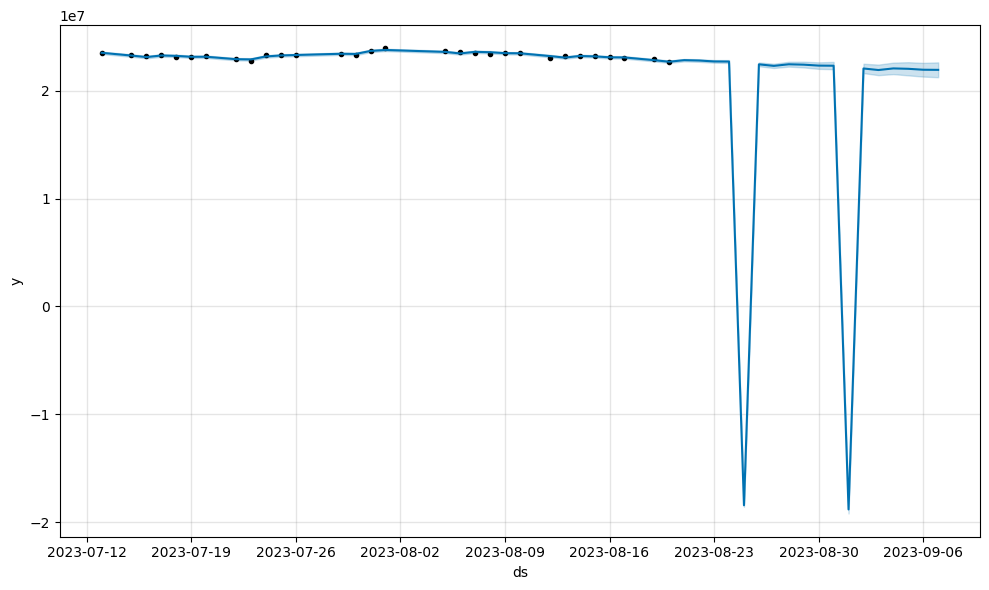

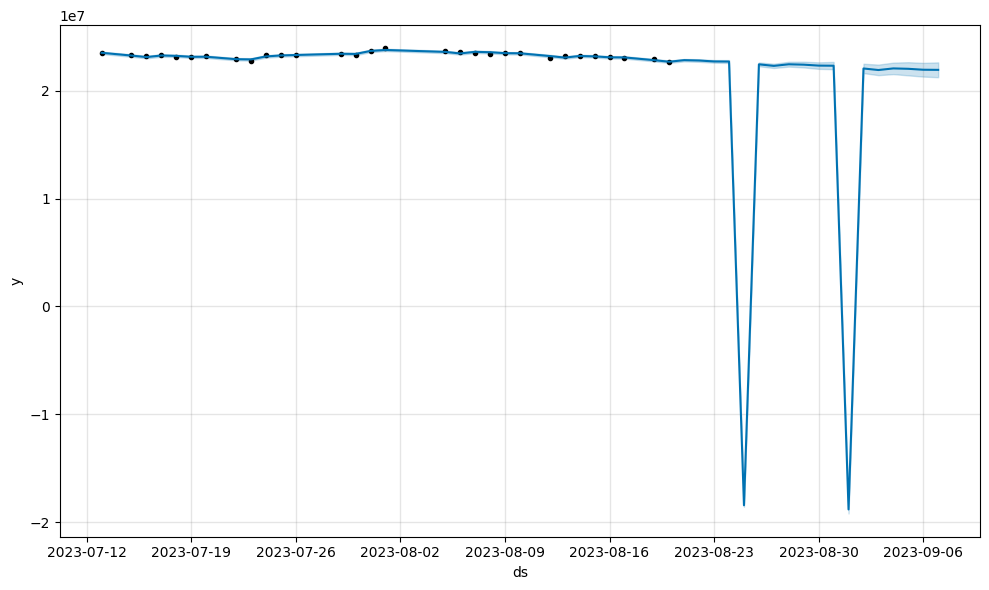

In [184]:
p_new.plot(forecast_new, uncertainty=True)